#Deep learning -
# Final Review -
# Malaria Cell Classification



In [ ]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!mkdir -p ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d iarunava/cell-images-for-detecting-malaria

 96% 651M/675M [00:05<00:00, 116MB/s]
100% 675M/675M [00:05<00:00, 132MB/s]


In [ ]:
!unzip cell-images-for-detecting-malaria.zip

Streaming output truncated to the last 5000 lines.
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_116.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_118.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_126.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_134.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_141.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_168.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_175.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_183.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_221.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_222.png  
  inflating: cell_i

The dataset is collected from the National Institutes of Health (NIH) for this research [23]; LHNCBC). There are 27,558 ​cell images in total. It is classified into two sections:parasitized 13,779 ,uninfected 13,779  The image resolutions are varying between 110 and 150 pixels. In the preprocessing section, the images are scaled into a fixed range of 64 pixels. 

In [ ]:
import os

In [ ]:
%rm -rf /content/cell_images/cell_images

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread

#Displaying Uninfected and Infected Cell tissues

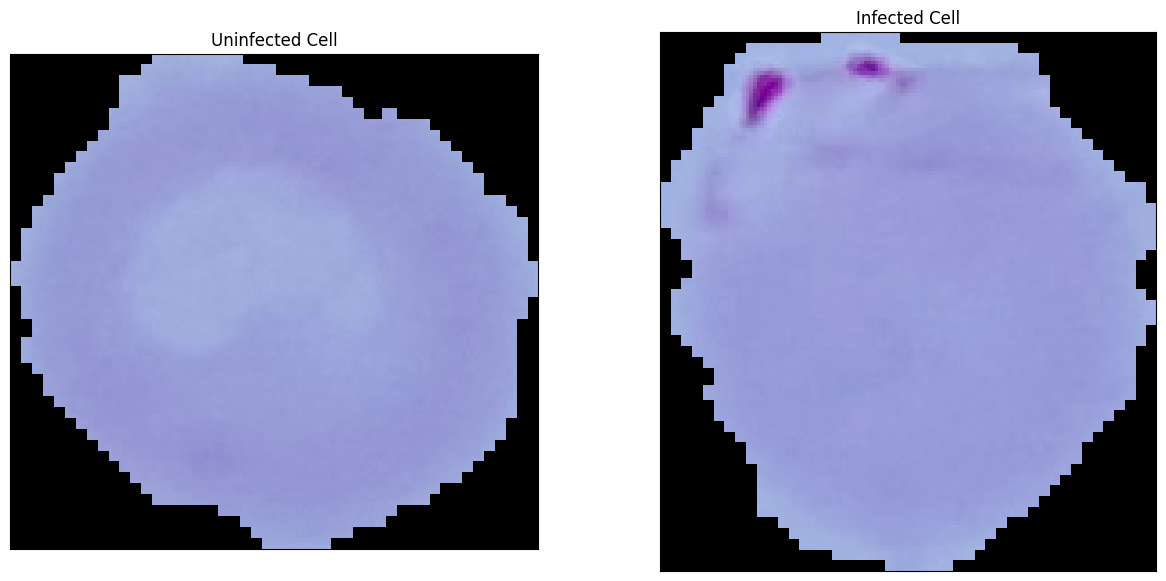

In [ ]:
import cv2

upic='/content/cell_images/Uninfected/C100P61ThinF_IMG_20150918_144104_cell_131.png'
apic='/content/cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_164.png'
plt.figure(1, figsize = (15 , 7))
plt.subplot(1 , 2 , 1)
plt.imshow(cv2.imread(upic))
plt.title('Uninfected Cell')
plt.xticks([]) , plt.yticks([])

plt.subplot(1 , 2 , 2)
plt.imshow(cv2.imread(apic))
plt.title('Infected Cell')
plt.xticks([]) , plt.yticks([])

plt.show()

In [ ]:
width = 128
height = 128

#Importing neccessary libraries

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dropout,Flatten,Dense,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau
from tensorflow import keras

#Dividing Dataset into two folders train and test

In [ ]:
datagen = ImageDataGenerator(rescale=1/255.0, validation_split=0.2)

#Preparing train and test Image Generator

In [ ]:
trainDatagen = datagen.flow_from_directory(directory='/content/cell_images/',
                                           target_size=(width,height),
                                           class_mode = 'binary',
                                           batch_size = 16,
                                           subset='training')

Found 22048 images belonging to 2 classes.


In [ ]:
valDatagen = datagen.flow_from_directory(directory='/content/cell_images/',
                                           target_size=(width,height),
                                           class_mode = 'binary',
                                           batch_size = 16,
                                           subset='validation',
                                           shuffle=False)

Found 5510 images belonging to 2 classes.


#Preparing the model

5 convolution  containing relu activation function ,  7 batch normalization , 5 max pool , 5 droput , 3 fully connected and 1 output layer containig  sigmoid activation faction 

In [ ]:
from tensorflow import keras
model = keras.models.Sequential([
keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape = [128,128,3], padding='same'),
keras.layers.MaxPooling2D(),
keras.layers.Conv2D(32, (2, 2), activation='relu', padding='same'),
keras.layers.MaxPooling2D(),

keras.layers.SeparableConv2D(64, 3, activation='relu', padding='same'),
keras.layers.SeparableConv2D(64, 3, activation='relu', padding='same'),
keras.layers.BatchNormalization(),
keras.layers.MaxPool2D(),

keras.layers.SeparableConv2D(128, 3, activation='relu', padding='same'),
keras.layers.SeparableConv2D(128, 3, activation='relu', padding='same'),
keras.layers.BatchNormalization(),
keras.layers.MaxPool2D(),
keras.layers.Dropout(0.2),

keras.layers.SeparableConv2D(256, 3, activation='relu', padding='same'),
keras.layers.SeparableConv2D(256, 3, activation='relu', padding='same'),
keras.layers.BatchNormalization(),
keras.layers.MaxPool2D(),
keras.layers.Dropout(0.2),

keras.layers.Flatten(),

keras.layers.Dense(512, activation='relu'),
keras.layers.BatchNormalization(),
keras.layers.Dropout(0.7),

keras.layers.Dense(128, activation='relu'),
keras.layers.BatchNormalization(),
keras.layers.Dropout(0.5),

keras.layers.Dense(64, activation='relu'),
keras.layers.BatchNormalization(),
keras.layers.Dropout(0.3),

keras.layers.Dense(1, activation ='sigmoid')])

In [ ]:
from keras.utils.vis_utils import plot_model

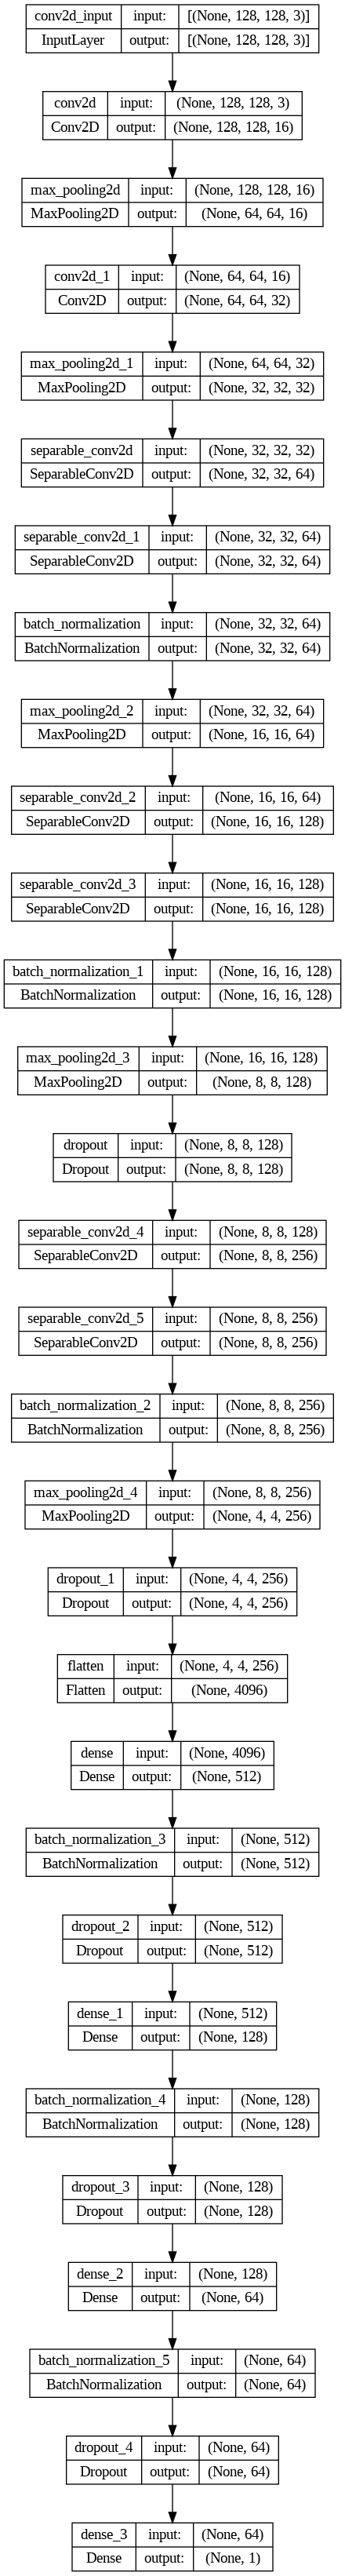

In [ ]:
plot_model(model, show_shapes=True, show_layer_names=True)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        2080      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 separable_conv2d (Separable  (None, 32, 32, 64)       2400      
 Conv2D)                                                         
                                                        

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=2)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=5, min_lr=0.001)
callbacks = [early_stopping, reduce_lr]

In [ ]:
history = model.fit(trainDatagen,
                    epochs =5,
                    validation_data = valDatagen,
                    callbacks=callbacks, 
                    batch_size=128)

Epoch 1/5
1378/1378 [==============================] - 359s 258ms/step - loss: 0.5556 - accuracy: 0.7020 - val_loss: 0.2147 - val_accuracy: 0.9426 - lr: 0.0010
Epoch 2/5
1378/1378 [==============================] - 356s 258ms/step - loss: 0.1965 - accuracy: 0.9428 - val_loss: 0.2137 - val_accuracy: 0.9338 - lr: 0.0010
Epoch 3/5
1378/1378 [==============================] - 361s 262ms/step - loss: 0.1821 - accuracy: 0.9477 - val_loss: 0.2479 - val_accuracy: 0.9465 - lr: 0.0010
Epoch 4/5
1378/1378 [==============================] - 360s 261ms/step - loss: 0.1718 - accuracy: 0.9499 - val_loss: 0.3638 - val_accuracy: 0.9330 - lr: 0.0010


In [ ]:
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

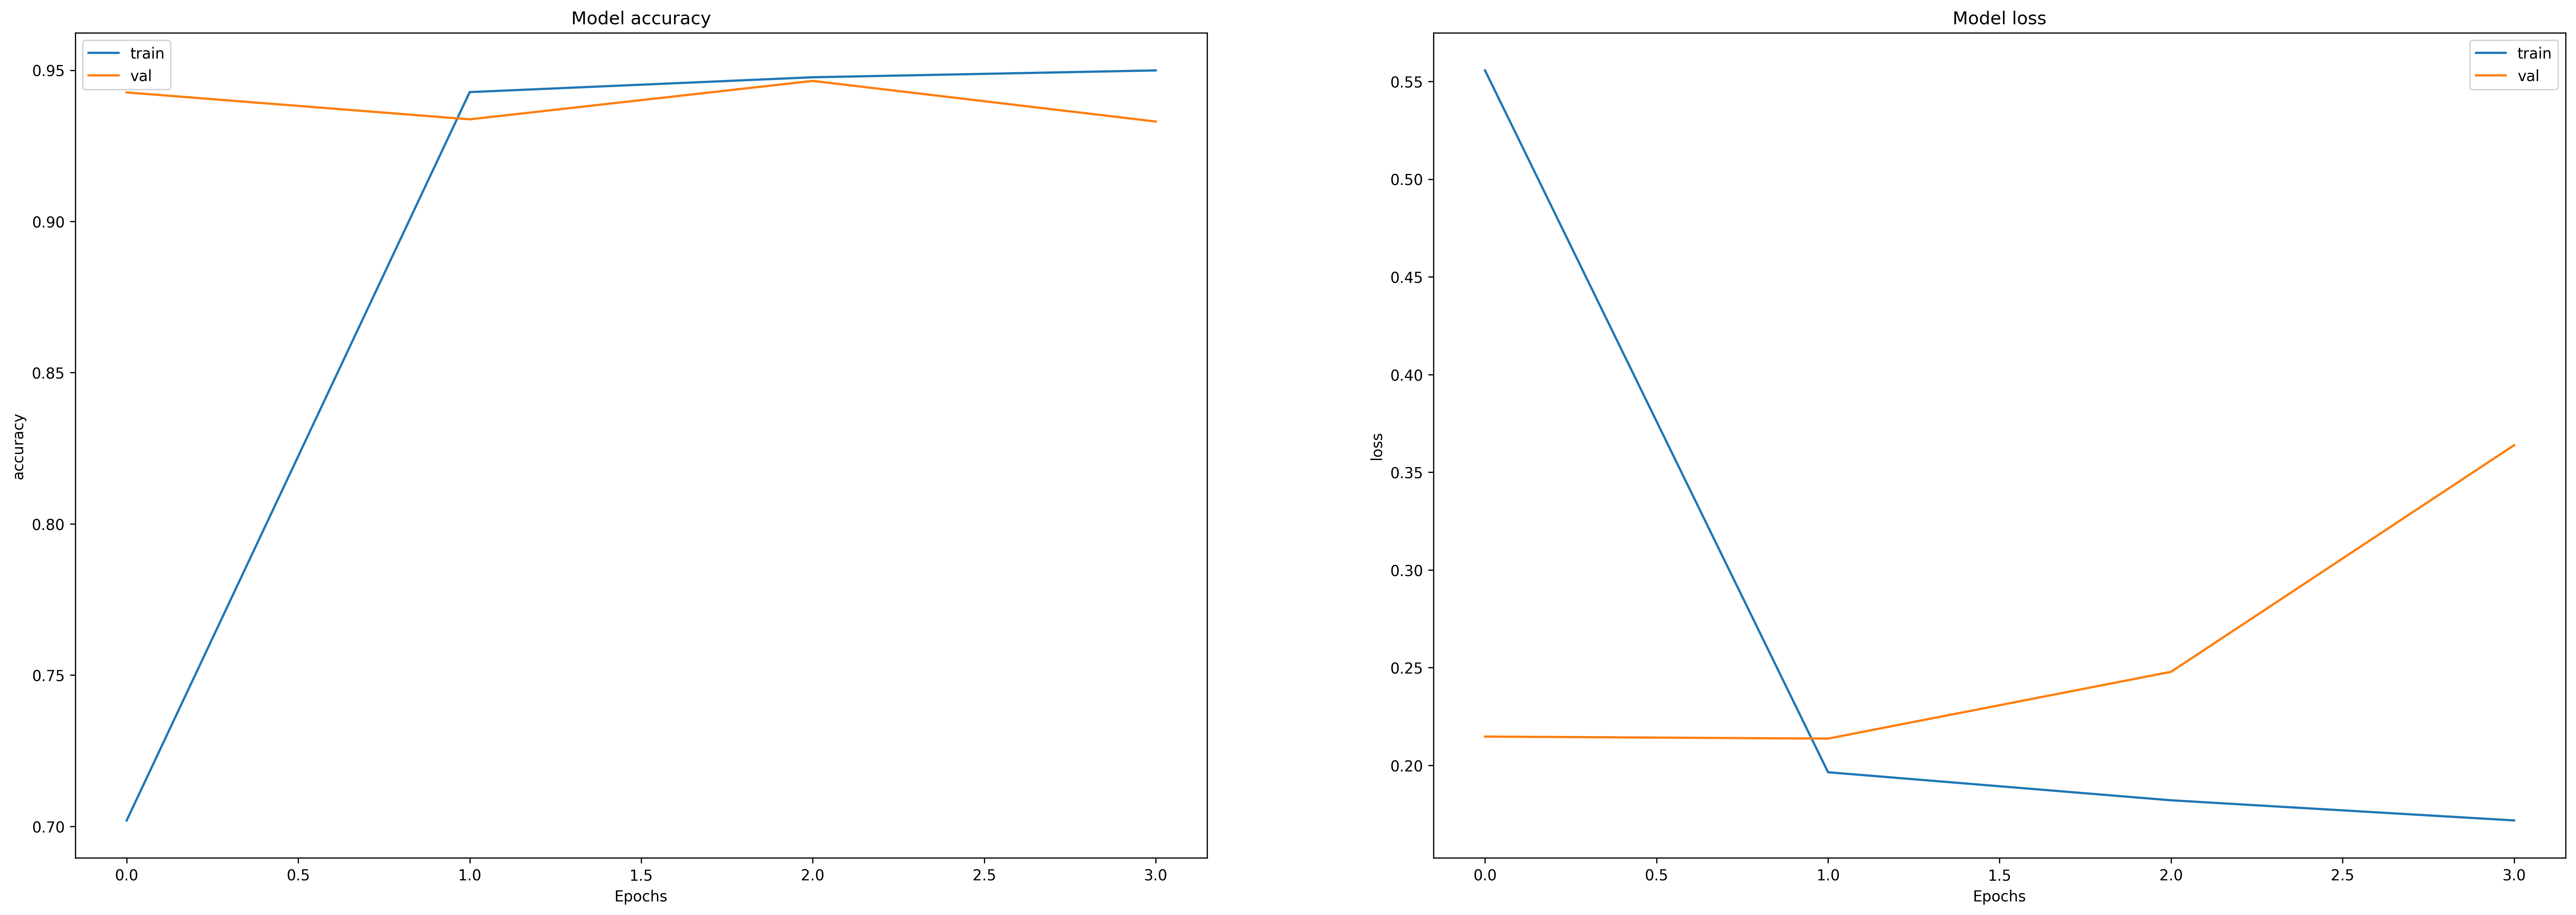

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (30, 10))
ax = ax.ravel()

for i, metric in enumerate(["accuracy", "loss"]):
    ax[i].plot(history.history[metric])
    ax[i].plot(history.history["val_" + metric])
    ax[i].set_title("Model {}".format(metric))
    ax[i].set_xlabel("Epochs")
    ax[i].set_ylabel(metric)
    ax[i].legend(["train", "val"])

In [ ]:
model.evaluate(valDatagen)

345/345 [==============================] - 27s 79ms/step - loss: 0.3638 - accuracy: 0.9330


[0.36383455991744995, 0.9330308437347412]

In [ ]:
df = pd.DataFrame(history.history)
#df.to_csv("Malaria-CNN.csv")

In [ ]:
df.head()

,loss,accuracy,val_loss,val_accuracy,lr
0,0.555641,0.701968,0.214715,0.942650,0.001
1,0.196465,0.942761,0.213673,0.933757,0.001
2,0.182109,0.947660,0.247863,0.946461,0.001
3,0.171806,0.949927,0.363835,0.933031,0.001


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
preds = model.predict(valDatagen)
y_pred = tf.where(preds<=0.5,0,1)
y_true = valDatagen.labels
print(classification_report(y_true,y_pred))

345/345 [==============================] - 27s 79ms/step
              precision    recall  f1-score   support

           0       0.98      0.88      0.93      2755
           1       0.89      0.98      0.94      2755

    accuracy                           0.93      5510
   macro avg       0.94      0.93      0.93      5510
weighted avg       0.94      0.93      0.93      5510



#Specificity and sensitivity of CNN


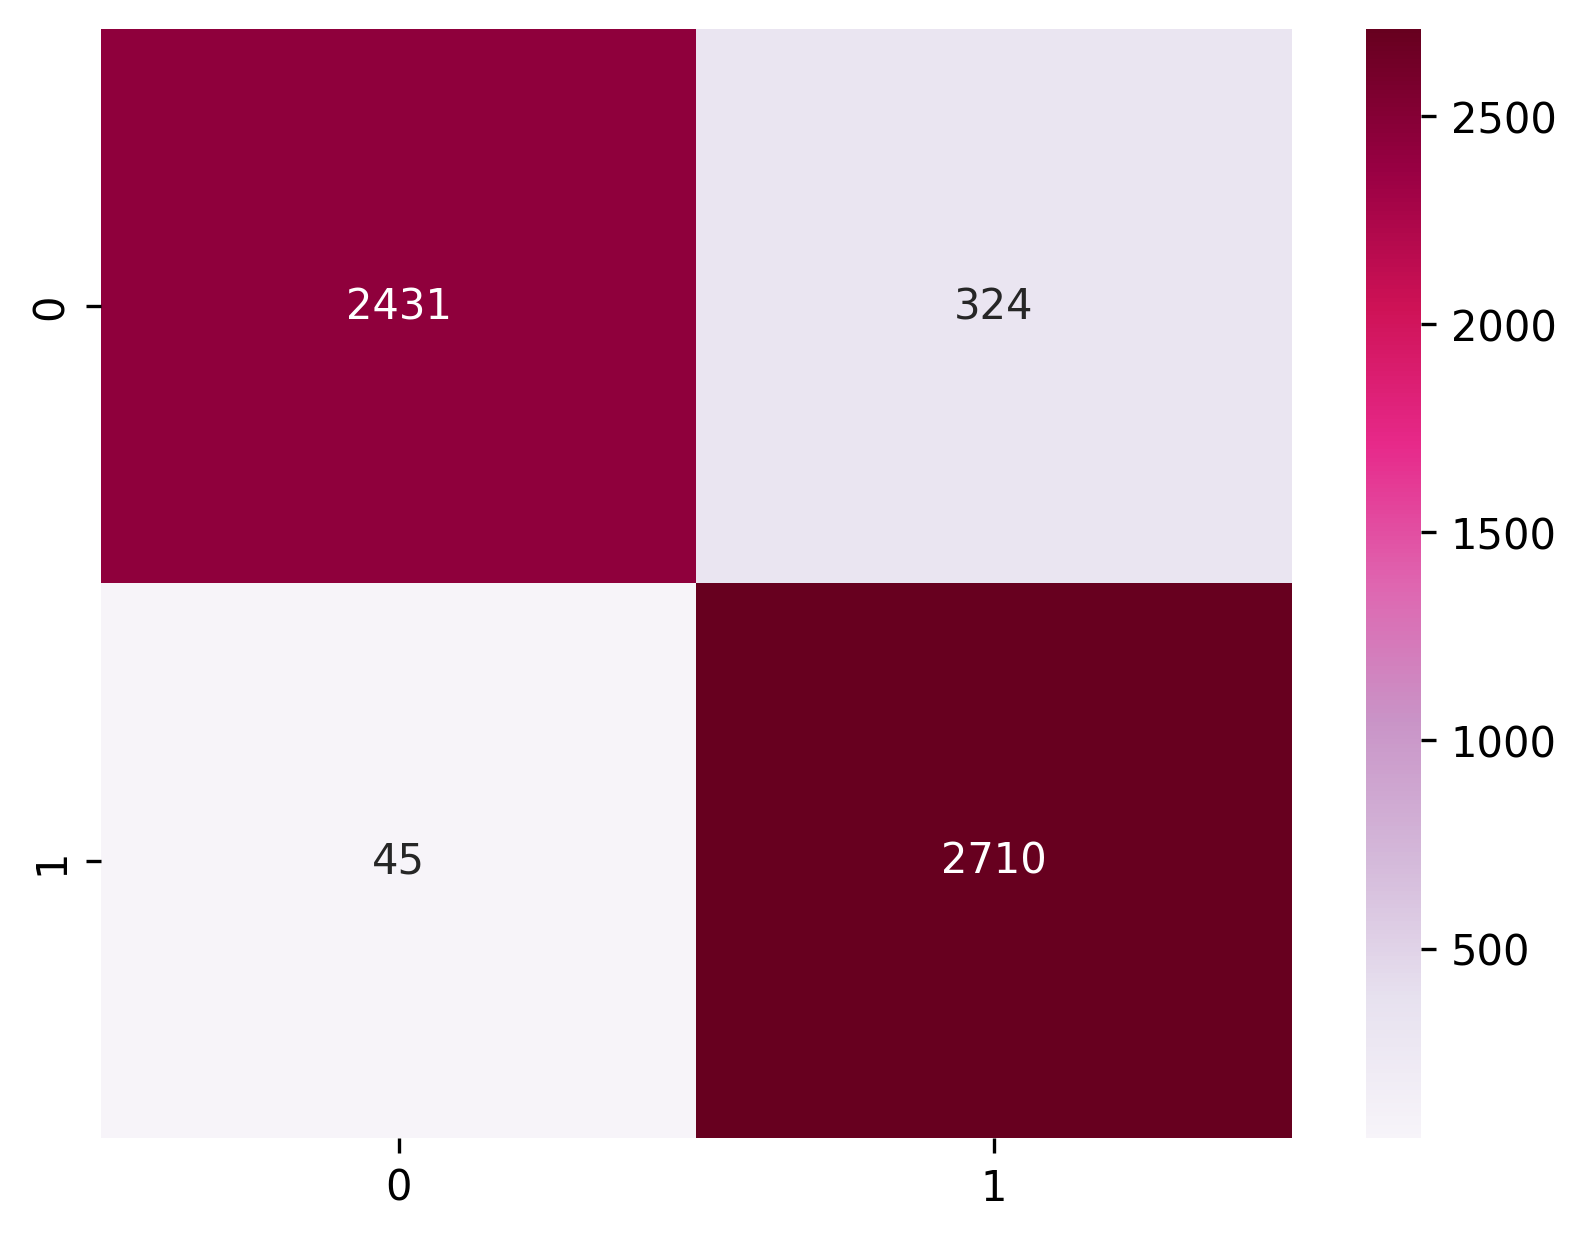

In [ ]:
import seaborn as sns
cnf = confusion_matrix(y_true,y_pred)
sns.heatmap(cnf, annot=True,fmt='g', cmap="PuRd")
plt.savefig("CNN-Confusion matrix.png")
plt.show()

In [ ]:
tp = 2542
fp = 213
tn = 2684 
fn = 71
sensitivity = tp/(tp+fn)
print(sensitivity)
specificity = tn/(tn+fp)
print(specificity)

0.9728281668580177
0.9264756644804971


#VGG16 Model

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Model

In [ ]:
vgg = VGG16(input_shape=(128,128,3), weights='imagenet', include_top=False)
for layer in vgg.layers:
    layer.trainable = False
x = Flatten()(vgg.output)

In [ ]:
prediction = Dense(1, activation='sigmoid')(x)

modelvgg = Model(inputs=vgg.input, outputs=prediction)
modelvgg.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0     

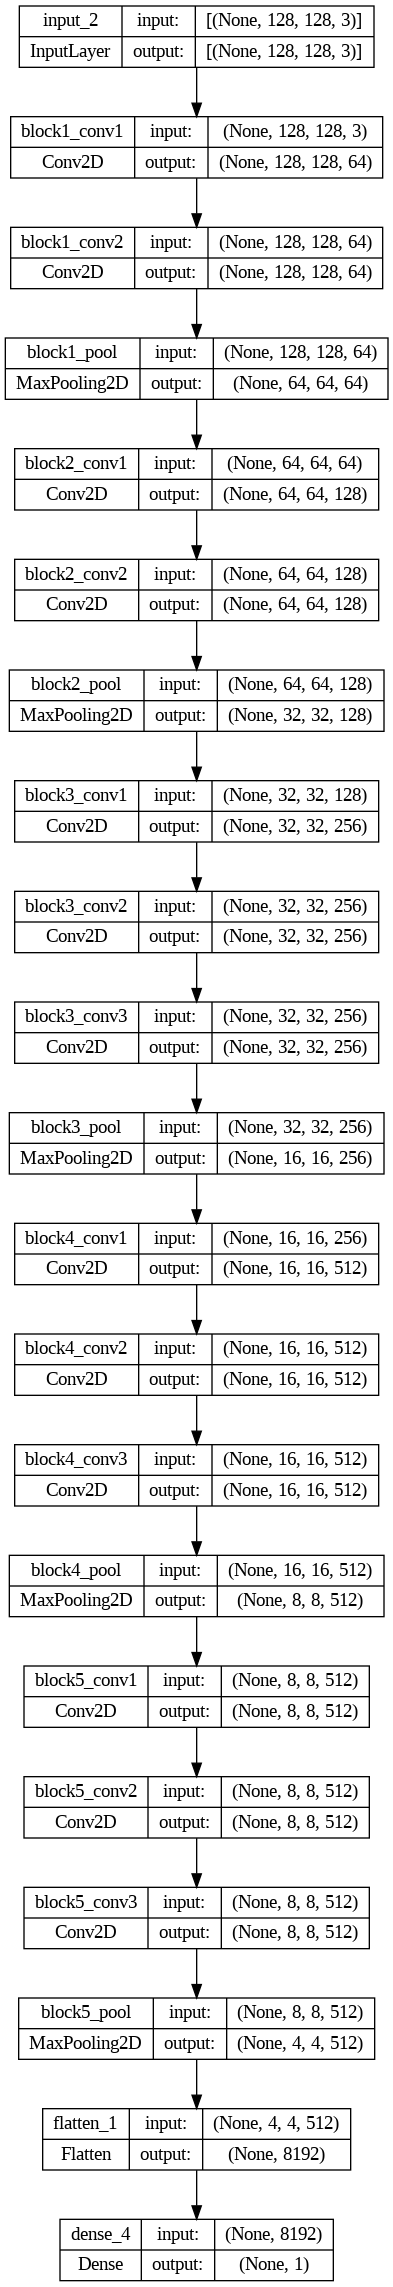

In [ ]:
plot_model(modelvgg, show_shapes=True, show_layer_names=True)

In [ ]:
METRICS = ['accuracy']

In [ ]:
modelvgg.compile(optimizer='adam',
              loss=['binary_crossentropy'],
              metrics=METRICS)

In [ ]:
history = modelvgg.fit(trainDatagen,
                    epochs =5,
                    validation_data = valDatagen,
                    callbacks=callbacks, 
                    batch_size=128)

Epoch 1/5
 383/1378 [=======>......................] - ETA: 36:08 - loss: 0.3062 - accuracy: 0.8786

KeyboardInterrupt: ignored

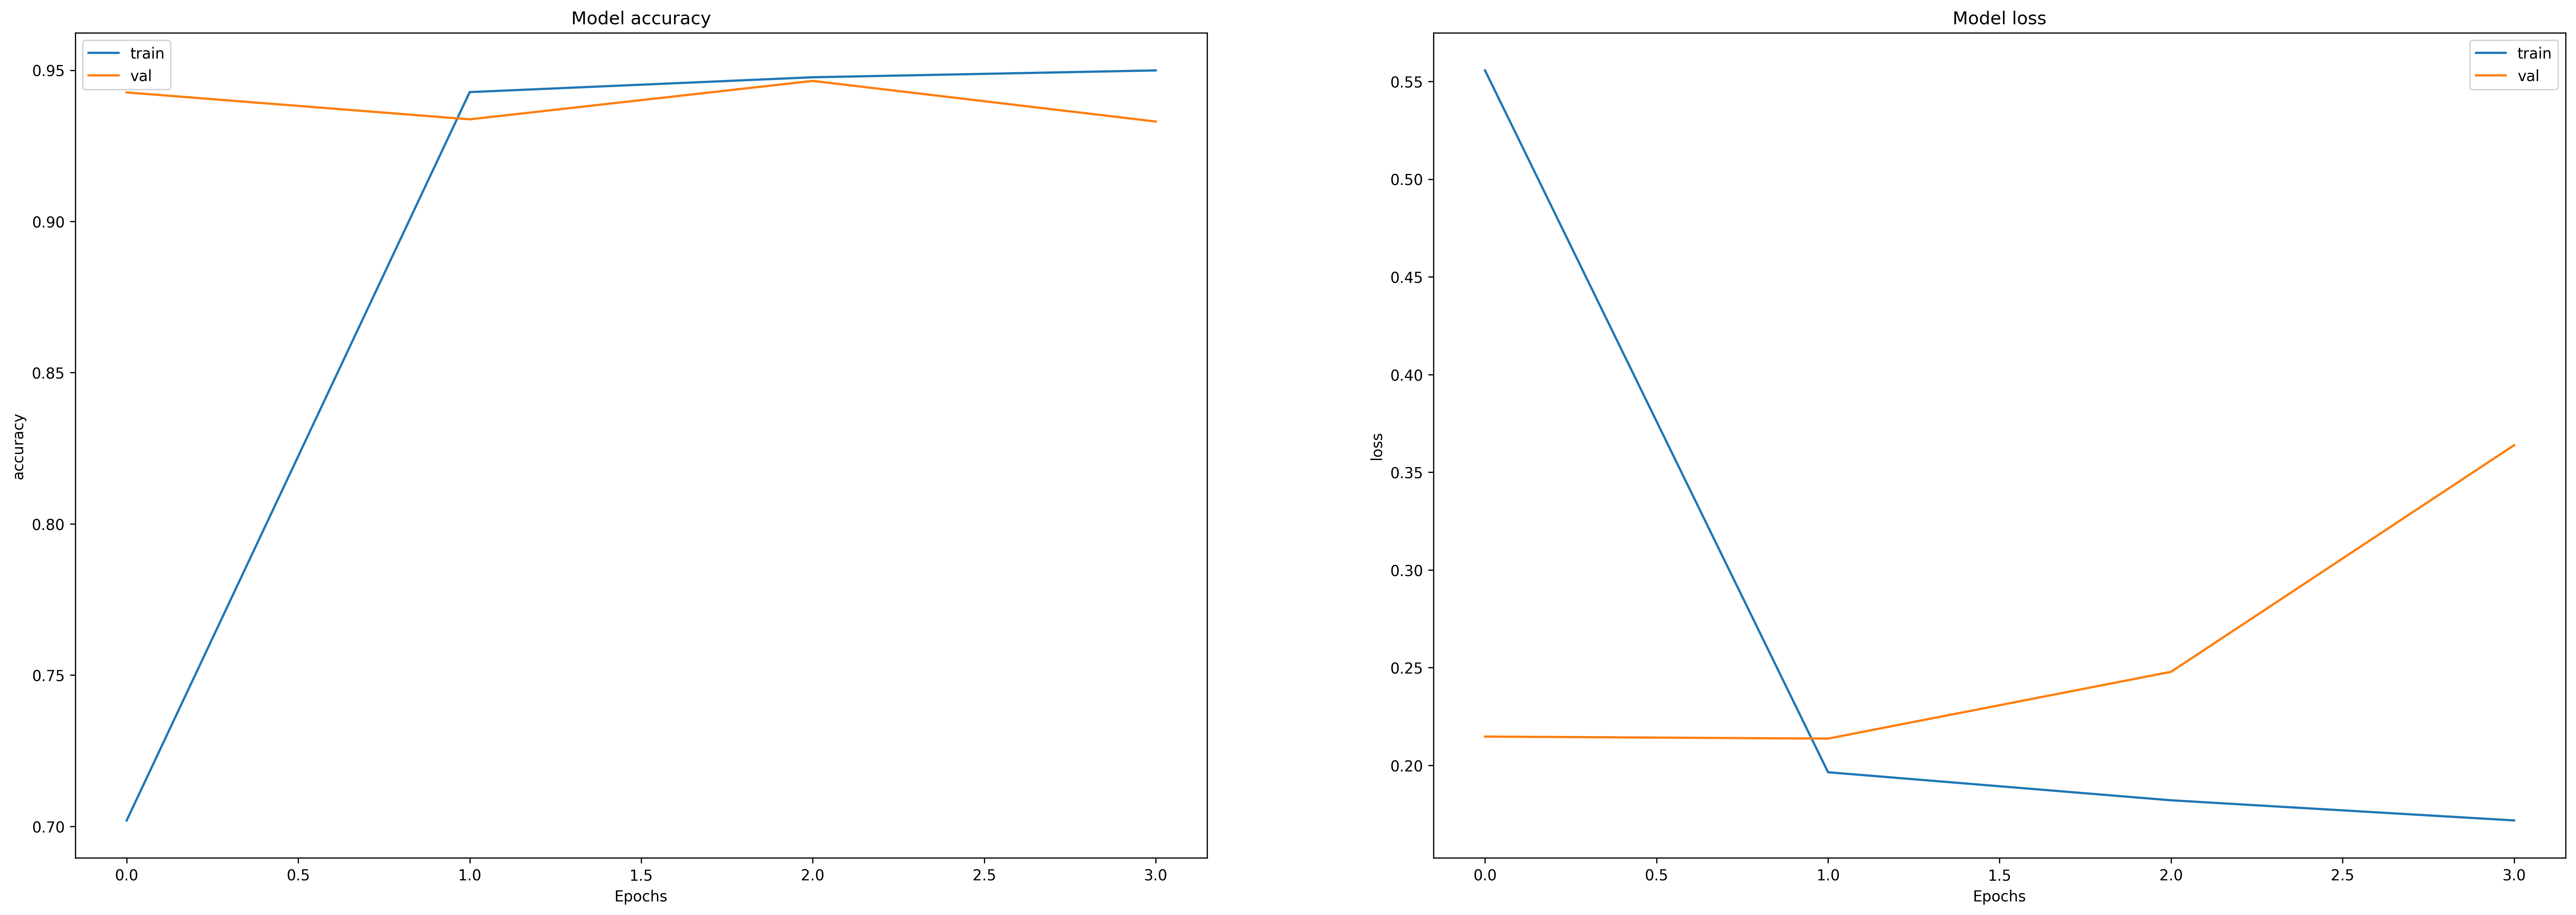

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (30, 10))
ax = ax.ravel()

for i, metric in enumerate(["accuracy", "loss"]):
    ax[i].plot(history.history[metric])
    ax[i].plot(history.history["val_" + metric])
    ax[i].set_title("Model {}".format(metric))
    ax[i].set_xlabel("Epochs")
    ax[i].set_ylabel(metric)
    ax[i].legend(["train", "val"])

In [ ]:
modelvgg.evaluate(valDatagen)

 28/345 [=>............................] - ETA: 11:36 - loss: 0.1105 - accuracy: 0.9576

KeyboardInterrupt: ignored

In [ ]:
df2 = pd.DataFrame(history.history)

In [ ]:
df2.head()


,loss,accuracy,val_loss,val_accuracy,lr
0,0.555641,0.701968,0.214715,0.942650,0.001
1,0.196465,0.942761,0.213673,0.933757,0.001
2,0.182109,0.947660,0.247863,0.946461,0.001
3,0.171806,0.949927,0.363835,0.933031,0.001


#Perfromance

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
preds = modelvgg.predict(valDatagen)
y_pred = tf.where(preds<=0.5,0,1)

  6/345 [..............................] - ETA: 12:30

KeyboardInterrupt: ignored

In [ ]:
y_true = valDatagen.labels
print(classification_report(y_true,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.88      0.93      2755
           1       0.89      0.98      0.94      2755

    accuracy                           0.93      5510
   macro avg       0.94      0.93      0.93      5510
weighted avg       0.94      0.93      0.93      5510



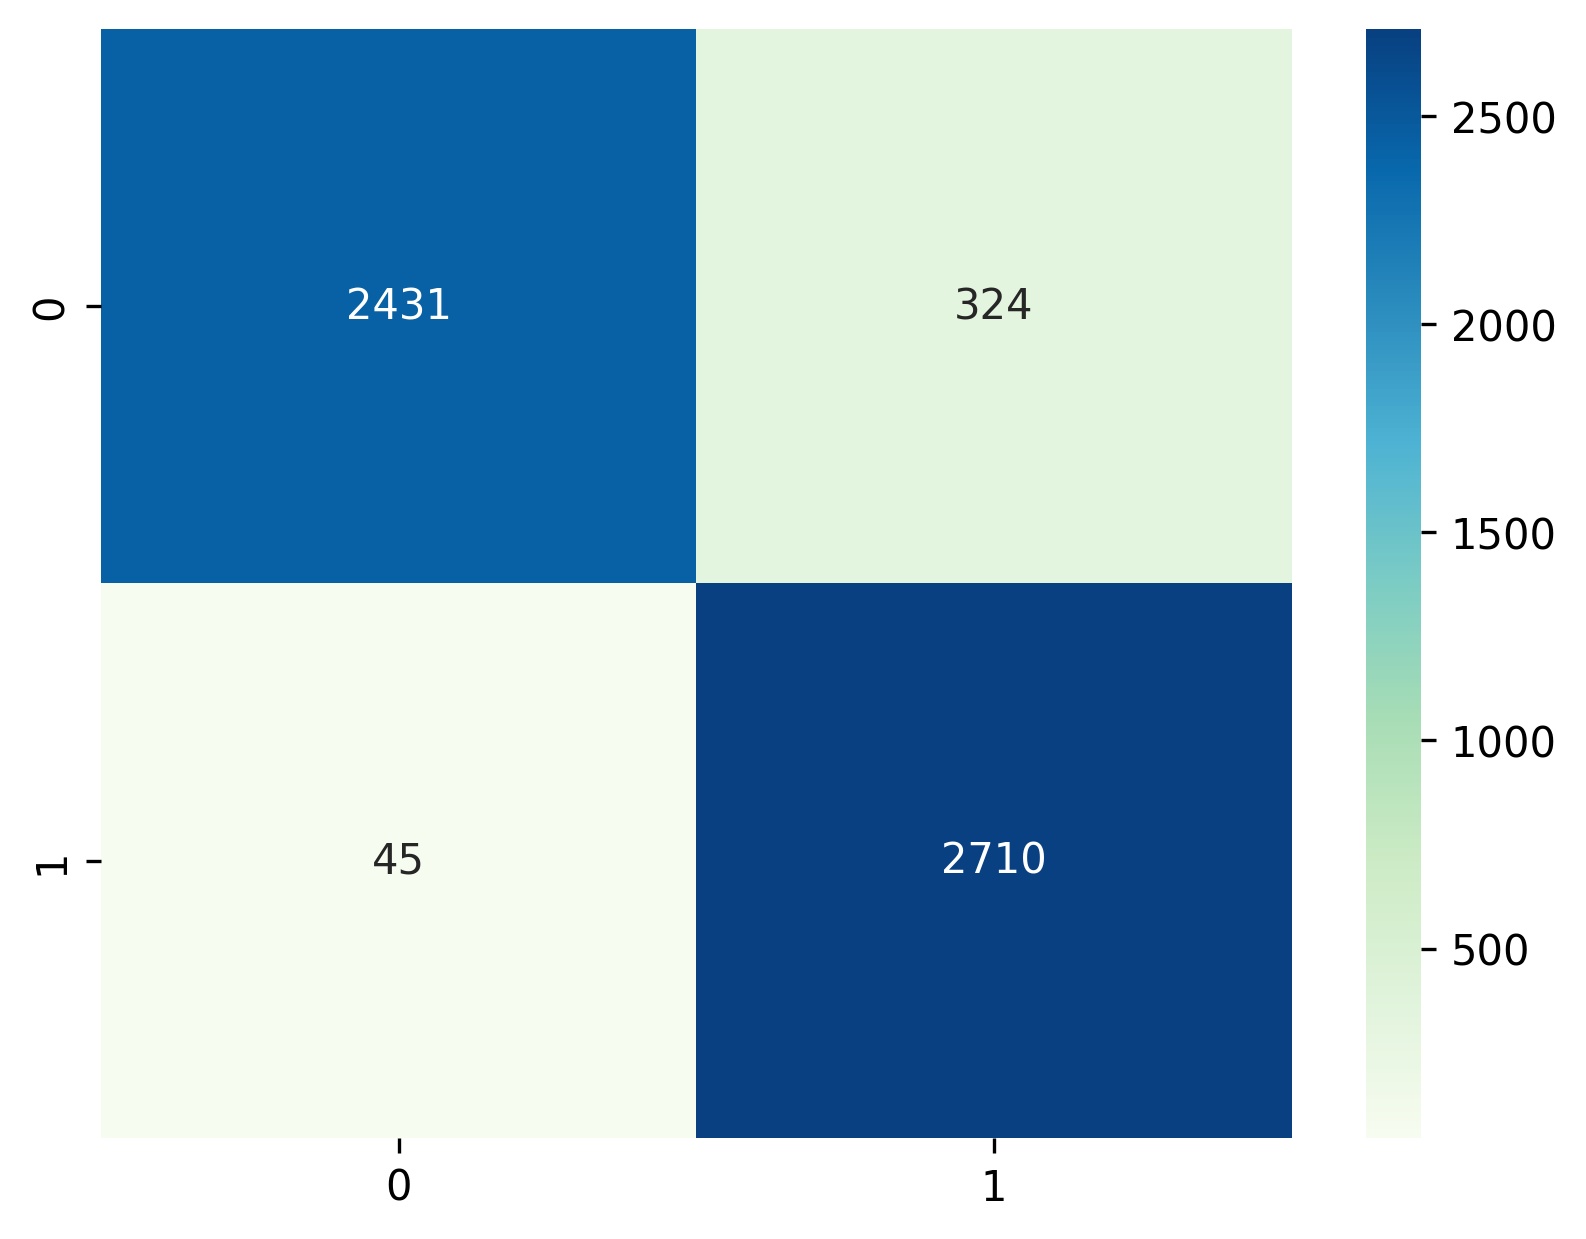

In [ ]:
import seaborn as sns
cnf_vgg = confusion_matrix(y_true,y_pred)
sns.heatmap(cnf_vgg, annot=True,fmt='g',cmap="GnBu")
plt.savefig("VGG-Confusion matrix.png")
plt.show()

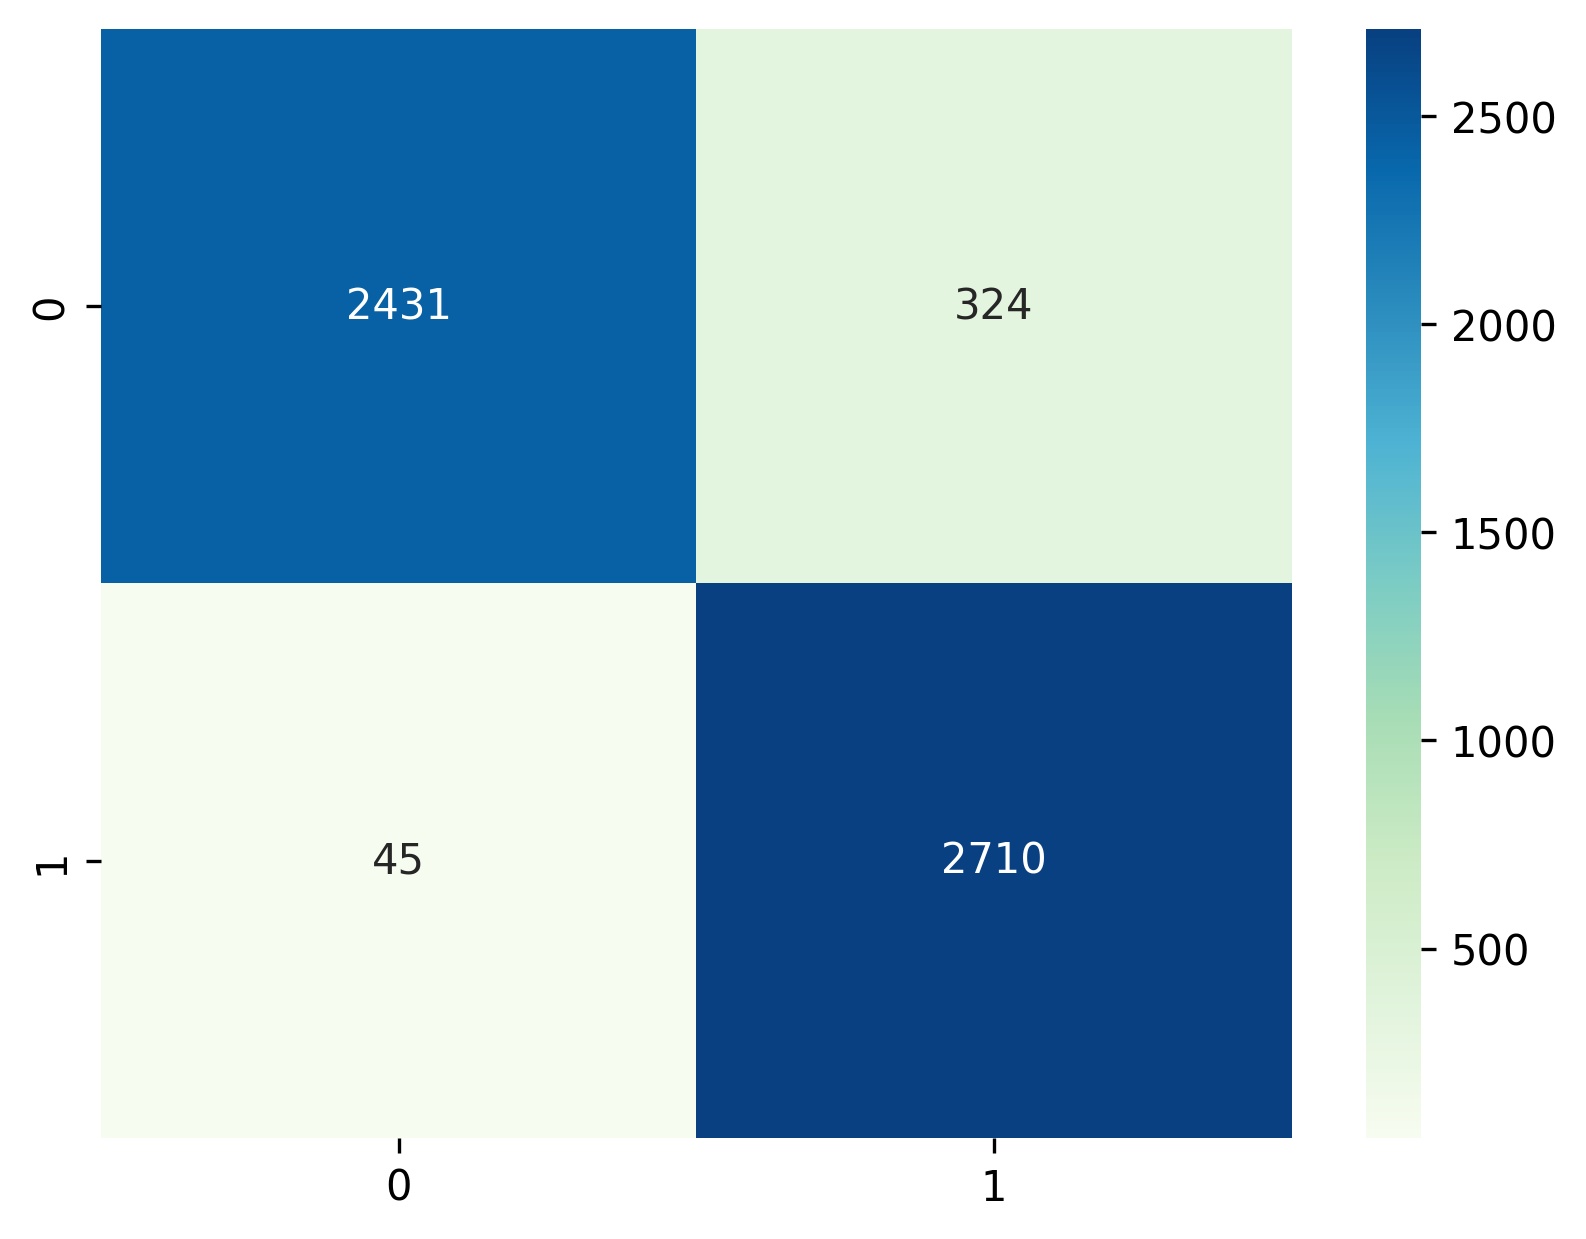

In [ ]:
import seaborn as sns
cnf_vgg = confusion_matrix(y_true,y_pred)
sns.heatmap(cnf_vgg, annot=True,fmt='g',cmap="GnBu")
plt.savefig("VGG-Confusion matrix.png")
plt.show()

#Specificity and sensitivity of VGG16

In [ ]:
tp = 2631
fp = 124
tn = 2500 
fn = 255
sensitivity = tp/(tp+fn)
print(sensitivity)
specificity = tn/(tn+fp)
print(specificity)

0.9116424116424117
0.9527439024390244


In [ ]:
from keras.applications import resnet, inception_v3, efficientnet
from keras.callbacks import ModelCheckpoint
from keras.optimizers import Adam, RMSprop
#from keras.layers import Dense, Dropout, Flatten, BatchNormalization, GlobalAveragePooling2D
from keras.layers import  GlobalAveragePooling2D

#Transfer Learning with ResNet5, InceptionV3, EfficientNetB7

In [ ]:
# ResNet50
def ResNet50_TL():
    model = Sequential()
    model.add(resnet.ResNet50(include_top=False, pooling='max', weights='imagenet', input_shape=(224, 224, 3)))
    model.add(BatchNormalization())
    model.add(Dropout(rate=0.3))
    model.add(Dense(6, activation='softmax', kernel_initializer='he_uniform'))
    model.layers[0].trainable = False
    opt = Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-7)
    model.compile(optimizer=opt, loss='categorical_crossentropy',\
                 metrics=['accuracy', Precision(thresholds=0.5), Recall(thresholds=0.5)])
    return model

# InceptionV3
def InceptionV3_TL():
    model = Sequential()
    model.add(inception_v3.InceptionV3(include_top=False, pooling='max', weights='imagenet', input_shape=(224, 224, 3)))
    model.add(BatchNormalization())
    model.add(Dropout(rate=0.3))
    model.add(Dense(6, activation='softmax', kernel_initializer='he_uniform'))
    model.layers[0].trainable = False
    opt = RMSprop(learning_rate=0.0001, rho=0.9, epsilon=1e-7)
    model.compile(optimizer=opt, loss='categorical_crossentropy',\
                 metrics=['accuracy', Precision(thresholds=0.5), Recall(thresholds=0.5)])
    return model

# EfficientNetB7
def EfficientNetB7_TL():
    model = Sequential()
    model.add(efficientnet.EfficientNetB7(include_top=False, weights='imagenet', input_shape=(224, 224, 3)))
    model.add(GlobalAveragePooling2D())
    model.add(BatchNormalization())
    model.add(Dropout(rate=0.3))
    model.add(Dense(6, activation='softmax', kernel_initializer='he_uniform'))
    model.layers[0].trainable = False
    opt = Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-7)
    model.compile(optimizer=opt, loss='categorical_crossentropy',\
                 metrics=['accuracy', Precision(thresholds=0.5), Recall(thresholds=0.5)])
    return model

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
preds = modelvgg.predict(valDatagen)
y_pred = tf.where(preds<=0.5,0,1)

In [ ]:
all_y_preds = [model.predict(iterator) for model, iterator in \
               zip([resnet50_model, inceptionV3_model, effnetB7_model],\
                   [preprocess_data(resnet), preprocess_data(inception_v3), preprocess_data(efficientnet)])]

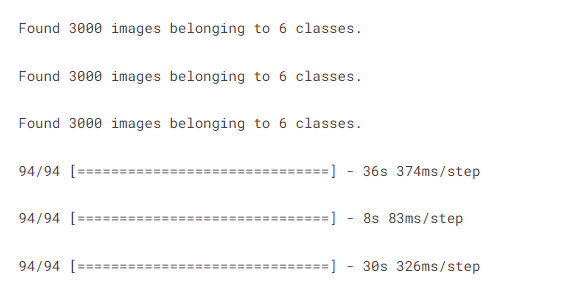

In [ ]:
all_y_preds = np.array(all_y_preds)
sum_y_preds = np.sum(all_y_preds, axis=0)
#Ensemble predictions
test_ensemble_labels = np.argmax(sum_y_preds, axis=1)
np.savetxt('ensemble_results_test.csv', test_ensemble_labels)

In [ ]:
#Ensemble prediction accuracy
test_iterator = preprocess_data(resnet)
np.mean(test_ensemble_labels == test_iterator.classes)

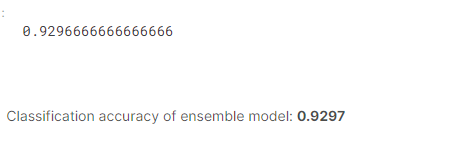